# Comparison Notebook for Model Training

In [1]:
import pandas as pd 
import numpy as np
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use(plt.style.available[24])
plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the xtick labels
plt.rc('ytick', labelsize=12)     # fontsize of the ytick labels (also applies to colorbar)
plt.rc('legend', fontsize=14)    # legend fontsize
plt.rc('figure', titlesize=20)   # fontsize of the figure title
plt.rc('lines', linewidth=2)     # line width
plt.rc('figure', figsize=(6, 5)) # figure size
plt.rc('axes', axisbelow=True)

## Read In Data

In [5]:
df_svgp_noise = pd.read_csv('svgp/results/SVGP_noise_split.csv')
df_svgp_data1 = pd.read_csv('svgp/results/SVGP_data_split_41.csv')
df_svgp_data2 = pd.read_csv('svgp/results/SVGP_data_split_42.csv')
df_svgp_data3 = pd.read_csv('svgp/results/SVGP_data_split_43.csv')

df_poly_data = pd.read_csv('poly/results/POLY_data_split.csv')
df_poly_noise = pd.read_csv('poly/results/POLY_noise_split.csv')

df_nn_noise = pd.read_csv('nn/results/NN_noise_split.csv')
df_nn_data1 = pd.read_csv('nn/results/NN_data_split_41.csv')
df_nn_data2 = pd.read_csv('nn/results/NN_data_split_42.csv')
df_nn_data3 = pd.read_csv('nn/results/NN_data_split_43.csv')

## Make Comparison Plot

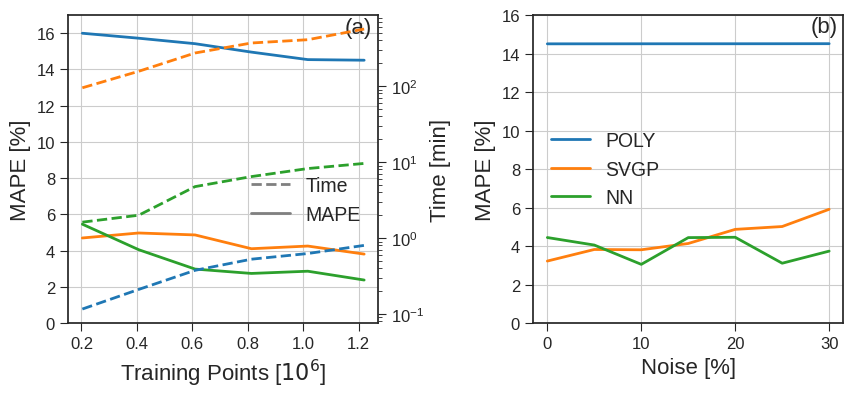

In [3]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 4))
for a in ax:
    a.grid(True)
ax[0].set_xlabel('Training Points [$10^6$]')
ax[0].set_ylabel('MAPE [%]')
ax[1].set_xlabel('Noise [%]')
ax[1].set_ylabel('MAPE [%]')

nn_data_err1 = (df_nn_data1['max mape corrected'] + df_nn_data1['tot mape corrected'] + df_nn_data1['avg mape corrected'])/3
nn_data_err2 = (df_nn_data2['max mape corrected'] + df_nn_data2['tot mape corrected'] + df_nn_data2['avg mape corrected'])/3
nn_data_err3 = (df_nn_data3['max mape corrected'] + df_nn_data3['tot mape corrected'] + df_nn_data3['avg mape corrected'])/3
nn_data_err_mean = (nn_data_err1 + nn_data_err2 + nn_data_err3)/3
nn_data_err_std = np.sqrt((np.square(nn_data_err1 - nn_data_err_mean) + np.square(nn_data_err2 - nn_data_err_mean) + np.square(nn_data_err3 - nn_data_err_mean))/2)
nn_data_time_mean = (df_nn_data1['time'] + df_nn_data2['time'] + df_nn_data3['time'])/3
nn_data_time_std = np.sqrt((np.square(df_nn_data1['time'] - nn_data_time_mean) + np.square(df_nn_data2['time'] - nn_data_time_mean) + np.square(df_nn_data3['time'] - nn_data_time_mean))/2)

svgp_data_err1 = (df_svgp_data1['max mape corrected'] + df_svgp_data1['tot mape corrected'] + df_svgp_data1['avg mape corrected'])/3
svgp_data_err2 = (df_svgp_data2['max mape corrected'] + df_svgp_data2['tot mape corrected'] + df_svgp_data2['avg mape corrected'])/3
svgp_data_err3 = (df_svgp_data3['max mape corrected'] + df_svgp_data3['tot mape corrected'] + df_svgp_data3['avg mape corrected'])/3
svgp_data_err_mean = (svgp_data_err1 + svgp_data_err2 + svgp_data_err3)/3
svgp_data_err_std = np.sqrt((np.square(svgp_data_err1 - svgp_data_err_mean) + np.square(svgp_data_err2 - svgp_data_err_mean) + np.square(svgp_data_err3 - svgp_data_err_mean))/2)
svgp_data_time_mean = (df_nn_data1['time'] + df_nn_data2['time'] + df_nn_data3['time'])/3
svgp_data_time_std = np.sqrt((np.square(df_svgp_data1['time'] - svgp_data_time_mean) + np.square(df_svgp_data2['time'] - svgp_data_time_mean) + np.square(df_svgp_data3['time'] - svgp_data_time_mean))/2)

ax[0].plot(df_poly_data['points']/1e6, (df_poly_data['max mape corrected'] + df_poly_data['tot mape corrected'] + df_poly_data['avg mape corrected'])/3, label='POLY')
ax[0].plot(df_svgp_data['points']/1e6, (df_svgp_data['max mape corrected'] + df_svgp_data['tot mape corrected'] + df_svgp_data['avg mape corrected'])/3, label='SVGP')
ax[0].plot(df_nn_data1['points']/1e6, nn_data_err_mean, label='NN')
ax2 = ax[0].twinx()
ax2.plot(df_poly_data['points']/1e6, df_poly_data['time']/60, linestyle='dashed', label='POLY Time')
ax2.plot(df_svgp_data['points']/1e6, nn_data_time_mean, linestyle='dashed', label='SVGP Time')
ax2.plot(df_nn_data1['points']/1e6, df_nn_data1['time']/60, linestyle='dashed', label='NN Time')
ax2.set_ylabel('Time [min]')
ax2.grid(False)
ax2.set_yscale('log')
ax2.set_frame_on(False)
ax[0].text(1.15, 16, '(a)', fontsize=16)
ax[0].set_ylim(0, 17)

ax[1].plot(df_poly_noise['noise'], (df_poly_noise['max mape corrected'] + df_poly_noise['tot mape corrected'] + df_poly_noise['avg mape corrected'])/3, label='POLY')
ax[1].plot(df_svgp_noise['noise'], (df_svgp_noise['max mape corrected'] + df_svgp_noise['tot mape corrected'] + df_svgp_noise['avg mape corrected'])/3, label='SVGP')
ax[1].plot(df_nn_noise['noise'], (df_nn_noise['max mape corrected'] + df_nn_noise['tot mape corrected'] + df_nn_noise['avg mape corrected'])/3, label='NN')
ax[1].legend(loc='center left')
ax[1].text(28, 15.1, '(b)', fontsize=16)
ax[1].set_ylim(0, 16)

# Add legend for training time
custom_lines = [Line2D([0], [0], color='gray', lw=2, linestyle='dashed'), Line2D([0], [0], color='gray', lw=2, linestyle='solid')]
ax[0].legend(custom_lines, ['Time', 'MAPE'], loc='center right', bbox_to_anchor = (1, 0.4))

fig.subplots_adjust(wspace=0.5)
fig.savefig('plots/combined_train.eps', format='eps', bbox_inches='tight')

## Version 2
Just do training points on x axis

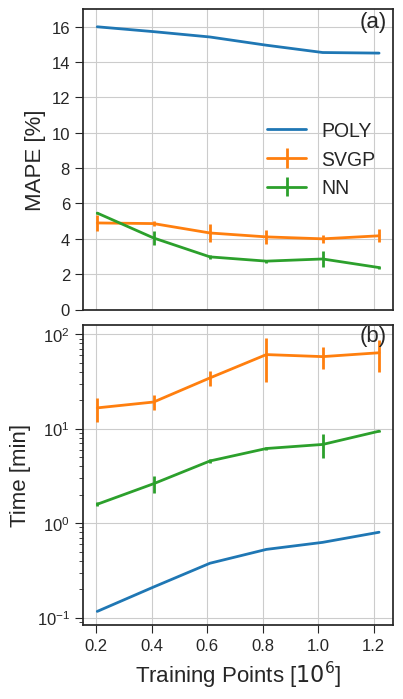

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(4, 8))
for a in ax:
    a.grid(True)
ax[1].set_xlabel('Training Points [$10^6$]')
ax[0].set_ylabel('MAPE [%]')
# ax[1].set_xlabel('Noise [%]')
ax[1].set_ylabel('MAPE [%]')

nn_data_err1 = (df_nn_data1['max mape corrected'] + df_nn_data1['tot mape corrected'] + df_nn_data1['avg mape corrected'])/3
nn_data_err2 = (df_nn_data2['max mape corrected'] + df_nn_data2['tot mape corrected'] + df_nn_data2['avg mape corrected'])/3
nn_data_err3 = (df_nn_data3['max mape corrected'] + df_nn_data3['tot mape corrected'] + df_nn_data3['avg mape corrected'])/3
nn_data_err_mean = (nn_data_err1 + nn_data_err2 + nn_data_err3)/3
nn_data_err_std = np.sqrt((np.square(nn_data_err1 - nn_data_err_mean) + np.square(nn_data_err2 - nn_data_err_mean) + np.square(nn_data_err3 - nn_data_err_mean))/2)
nn_data_time_mean = (df_nn_data1['time'] + df_nn_data2['time'] + df_nn_data3['time'])/3
nn_data_time_std = np.sqrt((np.square(df_nn_data1['time'] - nn_data_time_mean) + np.square(df_nn_data2['time'] - nn_data_time_mean) + np.square(df_nn_data3['time'] - nn_data_time_mean))/2)

svgp_data_err1 = (df_svgp_data1['max mape corrected'] + df_svgp_data1['tot mape corrected'] + df_svgp_data1['avg mape corrected'])/3
svgp_data_err2 = (df_svgp_data2['max mape corrected'] + df_svgp_data2['tot mape corrected'] + df_svgp_data2['avg mape corrected'])/3
svgp_data_err3 = (df_svgp_data3['max mape corrected'] + df_svgp_data3['tot mape corrected'] + df_svgp_data3['avg mape corrected'])/3
svgp_data_err_mean = (svgp_data_err1 + svgp_data_err2 + svgp_data_err3)/3
svgp_data_err_std = np.sqrt((np.square(svgp_data_err1 - svgp_data_err_mean) + np.square(svgp_data_err2 - svgp_data_err_mean) + np.square(svgp_data_err3 - svgp_data_err_mean))/2)
svgp_data_time_mean = (df_svgp_data1['time'] + df_svgp_data2['time'] + df_svgp_data3['time'])/3
svgp_data_time_std = np.sqrt((np.square(df_svgp_data1['time'] - svgp_data_time_mean) + np.square(df_svgp_data2['time'] - svgp_data_time_mean) + np.square(df_svgp_data3['time'] - svgp_data_time_mean))/2)

ax[0].plot(df_poly_data['points']/1e6, (df_poly_data['max mape corrected'] + df_poly_data['tot mape corrected'] + df_poly_data['avg mape corrected'])/3, label='POLY')
ax[0].errorbar(df_svgp_data1['points']/1e6, svgp_data_err_mean, yerr=svgp_data_err_std, label='SVGP', fmt='-')
# ax[0].plot(df_nn_data1['points']/1e6, nn_data_err_mean, label='NN')
ax[0].errorbar(df_nn_data1['points']/1e6, nn_data_err_mean, yerr=nn_data_err_std, label='NN', fmt='-')
ax[0].legend()
ax[0].xaxis.set_tick_params(which='both', bottom=False, top=False, labelbottom=False)
# ax2 = ax[0].twinx()
ax[1].plot(df_poly_data['points']/1e6, df_poly_data['time']/60, label='POLY Time')
ax[1].errorbar(df_svgp_data1['points']/1e6, svgp_data_time_mean/60, yerr=svgp_data_time_std/60, label='SVGP Time', fmt='-')
#ax[1].plot(df_nn_data1['points']/1e6, nn_data_time_mean/60, label='NN Time')
ax[1].errorbar(df_nn_data1['points']/1e6, nn_data_time_mean/60, yerr=nn_data_time_std/60, label='NN Time', fmt='-')
ax[1].set_ylabel('Time [min]')
# ax[1].grid(False)
ax[1].set_yscale('log')
# ax[1].set_frame_on(False)
ax[0].text(1.15, 16, '(a)', fontsize=16)
ax[0].set_ylim(0, 17)
ax[1].text(1.15, 85, '(b)', fontsize=16)

fig.subplots_adjust(hspace=0.05)
fig.savefig('plots/train_data_split.eps', format='eps', bbox_inches='tight')

## Noise Split

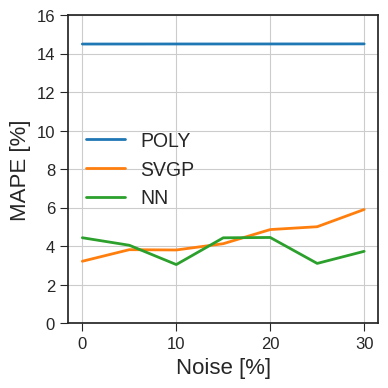

In [4]:
fig, ax = plt.subplots(figsize=(4, 4))
ax.grid(True)

ax.set_xlabel('Noise [%]')
ax.set_ylabel('MAPE [%]')

ax.plot(df_poly_noise['noise'], (df_poly_noise['max mape corrected'] + df_poly_noise['tot mape corrected'] + df_poly_noise['avg mape corrected'])/3, label='POLY')
ax.plot(df_svgp_noise['noise'], (df_svgp_noise['max mape corrected'] + df_svgp_noise['tot mape corrected'] + df_svgp_noise['avg mape corrected'])/3, label='SVGP')
ax.plot(df_nn_noise['noise'], (df_nn_noise['max mape corrected'] + df_nn_noise['tot mape corrected'] + df_nn_noise['avg mape corrected'])/3, label='NN')
ax.legend(loc='center left')
ax.set_ylim(0, 16)

# Add legend for training time
# custom_lines = [Line2D([0], [0], color='gray', lw=2, linestyle='dashed'), Line2D([0], [0], color='gray', lw=2, linestyle='solid')]
# ax[0].legend(custom_lines, ['Time', 'MAPE'], loc='center right', bbox_to_anchor = (1, 0.4))

fig.subplots_adjust(wspace=0.5)
fig.savefig('plots/train_noise_split.eps', format='eps', bbox_inches='tight')